# Solución LAB1
#### Julieth Andrea Mercado Long
#### Luis Fernando Marín Ortega

# Punto 1

In [32]:
# librerias para todo
from IPython.display import display, Math
import sympy as sp
from sympy.parsing.sympy_parser import parse_expr
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import sympy.plotting as pls
import seaborn as sns
import numpy as np
import math as mt

In [33]:
# Inicializo variables
x = parse_expr('x')
funcion = parse_expr('sinc(x)') # seno cardinal
n = 1
x0 = 0.1
error = 1
error_deseado = 10 ** -10

polinomio = funcion.subs(x, x0) # sustituimos (x = 1)

error_real = []

In [34]:
# mientras que el error sea 1 el codigo seguira buscando hasta econtrar alguno que sea igual a  10 ** -10 y se ira creando el polinomio junto al error de cada "intento"(iteración)
while error >= error_deseado:

  error = np.abs(np.float(funcion.subs(x, 0.2).evalf() - polinomio.subs(x, 0.2).evalf()))

  polinomio += sp.diff(funcion, x, n).subs(x, x0) * ((x - x0)**n)/(np.math.factorial(n))

  error_real.append(error)

  n = n + 1

n = n - 1 # al llegar a la última condición n fue incrementado 1 vez más de su valor real

In [35]:
# Se utiliza la derivada siguiente para hallar la serie de taylor correspondiente para hallar el error
derivada_n_siguiente = ((8 * x) * (x ** 6 + -42 * x ** 4 + 840 * x ** 2 -5040) * sp.cos(x) + (x ** 8 -56 * x ** 6 + 1680 * x ** 4 -20160 * x ** 2 + 40320) * sp.sin(x)) / x ** 9

In [36]:
# 0, 14 = punto maximo de la octava derivada de sinc(x)
resultado = derivada_n_siguiente.subs(x, 0.14).evalf()

In [37]:
# calculo error teorico
error_teorico = [resultado / mt.factorial(n+1) for n in [1, 2, 3, 4, 5, 6, 7]]

In [38]:
error_teorico

[0.0551127626070480,
 0.0183709208690160,
 0.00459273021725400,
 0.000918546043450801,
 0.000153091007241800,
 2.18701438916857e-5,
 2.73376798646072e-6]

In [59]:
error_teorico_np = np.array([0.0551127626070480,
0.0183709208690160,
0.00459273021725400,
0.000918546043450801,
0.000153091007241800,
2.18701438916857e-5,
2.73376798646072e-6]) 
# Según StackOverflow, Numpy tiene un error cuando se va a graficar porque no se calcula log10
# entonces se usa (np.array) para convertir "error_teorico" en un arreglo tipo float en numpy

In [60]:
error_real 

[0.0049875124929754655,
 0.0016575113027197386,
 4.158339365845087e-06,
 8.289727436716632e-07,
 1.3863276082659581e-09,
 1.9739410106467403e-10,
 2.473576898864849e-13]

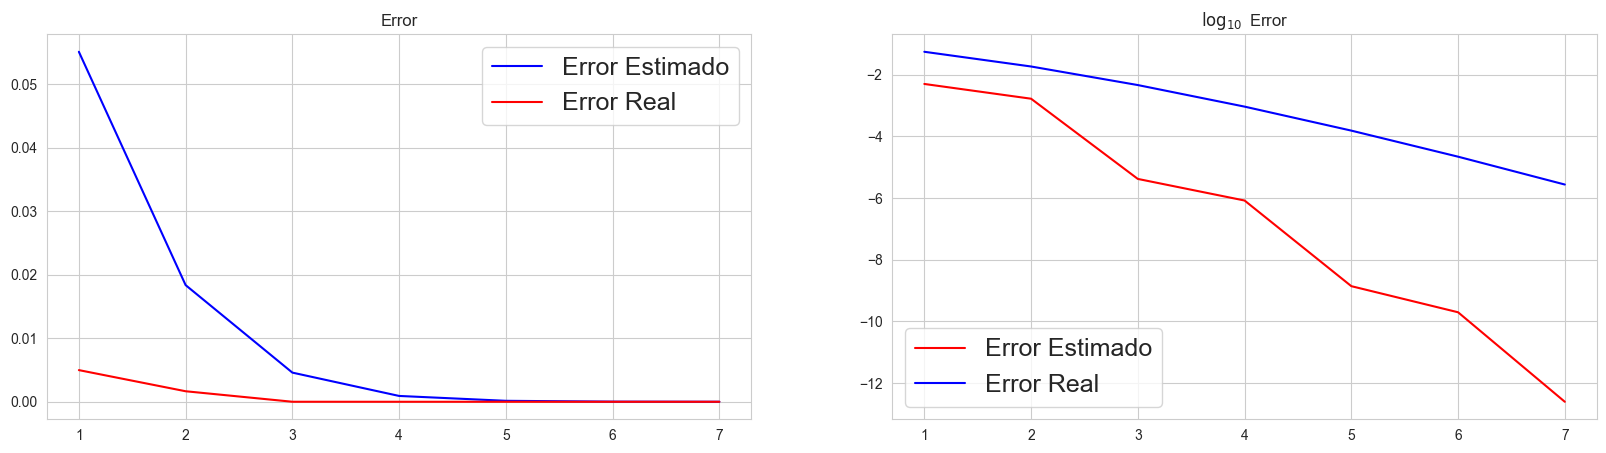

In [82]:
# Grafico 1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

ax1.plot([1, 2, 3, 4, 5, 6, 7],error_teorico,color='b')

ax1.plot([1, 2, 3, 4, 5, 6, 7],error_real, color = 'r')

ax1.set_title('Error')

ax1.legend(['Error Estimado', 'Error Real'], prop={'size':18})

# Grafico 2

ax2.plot([1, 2, 3, 4, 5, 6, 7],np.log10(error_real), color = 'r')

ax2.plot([1, 2, 3, 4, 5, 6, 7],np.log10(error_teorico_np),color='b')

ax2.set_title('$\log_{10}$ Error')

ax2.legend(['Error Estimado', 'Error Real'], prop={'size':18});

# Punto 2

La fórmula de diferencias progresivas para aproximar la primera, segunda y tercera derivada de una función f en el punto x0 del intervalo [a, b], con un error de orden O(h^3) pueden ser calculadas de la siguiente manera:

Primera derivada:
f'(x0) ≈ (-3f(x0) + 4f(x0+h) - f(x0+2h)) / (2h)

Segunda derivada:
f''(x0) ≈ (2f(x0) - 5f(x0+h) + 4f(x0+2h) - f(x0+3h)) / h^2

Tercera derivada:
f'''(x0) ≈ (-5f(x0) + 18f(x0+h) - 24f(x0+2h) + 14f(x0+3h) - 3f(x0+4h)) / (2h^3)

## Diferencia Progresiva
Sea $x_1 = x_0 + h, x_2 = x_0 + 2h, x_3 = x_0 + 3h$ reemplazando en la expansión de taylor tenemos que:

*   $f(x_0 + h) = f(x_0) + f'(x_0)h + \frac{f''(x_0)}{2!}h^2 + \frac{f'''(x_0)}{3!}h^3 + \frac{f^{(4)}(x_0)}{4!}h^4$
*   $f(x_0 + 2h) = f(x_0) + f'(x_0)2h + \frac{f''(x_0)}{2!}(2h)^2 + \frac{f'''(x_0)}{3!}(2h)^3 + \frac{f^{(4)}(x_0)}{4!}(2h)^4$
*   $f(x_0 + 3h) = f(x_0) + f'(x_0)3h + \frac{f''(x_0)}{2!}(3h)^2 + \frac{f'''(x_0)}{3!}(3h)^3 + \frac{f^{(4)}(x_0)}{4!}(3h)^4$

Sustituyendo obtenemos: $f(x_0 + 3h) - 3f(x_0 + 2h) + 3f(x_0 + h) - f(x_0) = 3f'(x_0)h + \frac{3f''(x_0)}{2!}h^2 + \frac{9f'''(x_0)}{3!}h^3 + \frac{f^{(4)}(x_0)}{4!}(3h)^4 - 3\frac{f''(x_0)}{2!}h^2 - 9\frac{f'''(x_0)}{3!}h^3 - 8\frac{f^{(4)}(\xi_2)}{4!}(2h)^4$

Despejando $f'(x_0)$:

$f'(x_0) = \frac{-11f(x_0) + 18f(x_0 + h) - 9f(x_0 + 2h) + 2f(x_0 + 3h)}{6h} - \frac{f''''(\xi)}{4!}(3h)^3$



In [62]:
# Subrutina que expresa xlnx
def f(x):
    return x * mt.log(x)

# Subrutina que deriva
def df(x, h):
    return (-3*f(x) + 4*f(x+h) - f(x+2*h)) / (2*h)

x0 = 1
exact_derivative = 1
h_values = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125]


# Calcular el error con cada valor de h (h_values)
errors = []
for h in h_values:
    approx_derivative = df(x0, h)
    error = abs(approx_derivative - exact_derivative)
    errors.append(error)

# Prints de cada valor de h evaluado
for i in range(len(h_values)):
    print("h = {:.5f}: error = {:.10f}".format(h_values[i], errors[i]))

h = 0.10000: error = 0.0028946149
h = 0.05000: error = 0.0007749173
h = 0.02500: error = 0.0002007849
h = 0.01250: error = 0.0000511236
h = 0.00625: error = 0.0000128998
h = 0.00313: error = 0.0000032400


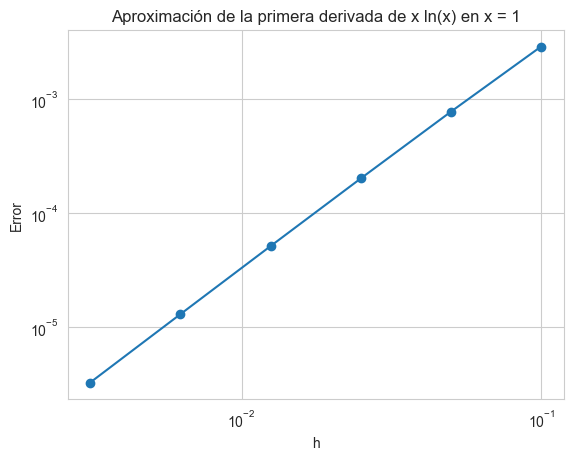

In [63]:
# Grafico
plt.plot(h_values, errors, '-o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('Error')
plt.title('Aproximación de la primera derivada de x ln(x) en x = 1')
plt.show()

In [64]:
# Se busca cual es el valor minimo dentro del arreglo con respecto a h
min(errors)

3.2400160188128524e-06

El valor que minimiza el error es: $0.00313$

La fórmula de diferencias regresivas para aproximar la primera, segunda y tercera derivada de una función f en el punto x0 del intervalo [a, b], con un error de orden O(h^3) pueden ser calculadas de la siguiente manera:

Primera derivada:
f'(x0) ≈ (3f(x0) - 4f(x0-h) + f(x0-2h)) / (2h)

Segunda derivada:
f''(x0) ≈ (2f(x0) - 5f(x0-h) + 4f(x0-2h) - f(x0-3h)) / h^2

Tercera derivada:
f'''(x0) ≈ (5f(x0) - 18f(x0-h) + 24f(x0-2h) - 14f(x0-3h) + 3f(x0-4h)) / (2h^3)


##Diferenciacion Regresiva

Se inicia en orden 4 y se obtiene asi:

$f'(x_0) = \frac{11f(x_0) - 18f(x_0 - h) + 9f(x_0 - 2h) - 2f(x_0 - 3h)}{6h} + \frac{f''''(\xi)}{4!}(3h)^3$

donde $\xi$ es algún punto en el intervalo $(x_0 - 3h, x_0)$.

Con respecto a $x$ en taylor

$f''''(\xi) = f''''(x_0) + (\xi - x_0)f'''''(x_0) + \frac{(\xi - x_0)^2}{2!}f''''''(x_0) + \frac{(\xi - x_0)^3}{3!}f^{(5)}(\xi_1)$

donde $\xi_1$ es algún punto en el intervalo $(x_0 - 3h, x_0)$.

Sustituyendo esta aproximación en la fórmula de diferencia regresiva, tenemos:

$f'(x_0) = \frac{11f(x_0) - 18f(x_0 - h) + 9f(x_0 - 2h) - 2f(x_0 - 3h)}{6h} + \frac{1}{4!}(3h)^3\left(f''''(x_0) + (\xi - x_0)f'''''(x_0) + \frac{(\xi - x_0)^2}{2!}f''''''(x_0) + \frac{(\xi - x_0)^3}{3!}f^{(5)}(\xi_1)\right)$

Reordenando términos, obtenemos:

$f'(x_0) = \frac{11f(x_0) - 18f(x_0 - h) + 9f(x_0 - 2h) - 2f(x_0 - 3h)}{6h} + \frac{f''''(x_0)}{4!}(3h)^3 - \frac{(\xi - x_0)f'''''(x_0)}{4!}(3h)^3 - \frac{(\xi - x_0)^2 f''''''(x_0)}{4!}(3h)^3 - \frac{(\xi - x_0)^3 f^{(5)}(\xi_1)}{4!}(3h)^3$

In [65]:
# Subrutina que expresa xlnx
def f(x):
    return x * mt.log(x)

# Subrutina que deriva
def df(x, h):
    return (f(x-2*h) - 4*f(x-h) + 3*f(x)) / (2*h)

x0 = 1
exact_derivative = 1
h_values = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125]

# Calcular el error con cada valor de h (h_values)
errors = []
for h in h_values:
    approx_derivative = df(x0, h)
    error = abs(approx_derivative - exact_derivative)
    errors.append(error)

# Prints de cada valor de h evaluado
for i in range(len(h_values)):
    print("h = {:.5f}: error = {:.10f}".format(h_values[i], errors[i]))

h = 0.10000: error = 0.0039150766
h = 0.05000: error = 0.0009005458
h = 0.02500: error = 0.0002164294
h = 0.01250: error = 0.0000530773
h = 0.00625: error = 0.0000131440
h = 0.00313: error = 0.0000032705


In [66]:
# Se busca cual es el valor minimo dentro del arreglo con respecto a h
min(errors)

3.27053421078638e-06

el valor que minimiza el error es: $0.00313$

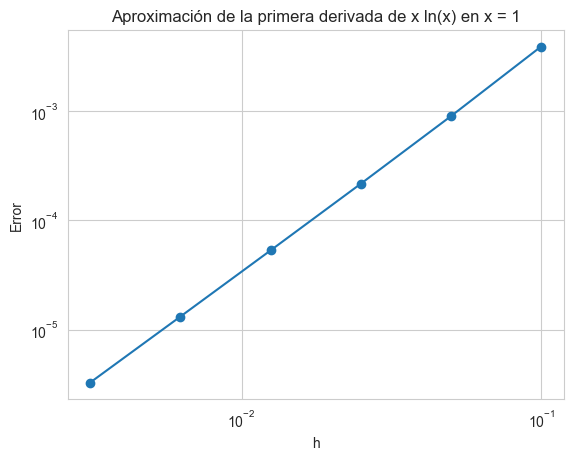

In [67]:
# Grafico

plt.plot(h_values, errors, '-o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('Error')
plt.title('Aproximación de la primera derivada de x ln(x) en x = 1')
plt.show()


La fórmula de diferencias centrales para aproximar la primera, segunda y tercera derivada de una función f en el punto x0 del intervalo [a, b], con un error de orden O(h^3) pueden ser calculadas de la siguiente manera:

Primera derivada:
f'(x0) ≈ (f(x0+h) - f(x0-h)) / (2h)

Segunda derivada:
f''(x0) ≈ (f(x0+h) - 2f(x0) + f(x0-h)) / h^2

Tercera derivada:
f'''(x0) ≈ (f(x0-2h) - 2f(x0-h) + 2f(x0+h) - f(x0+2h)) / (2h^3)

In [68]:
# Subrutina que expresa xlnx
def f(x):
    return x * mt.log(x)

# Subrutina que deriva
def df(x, h):
    return (f(x+h) - f(x-h)) / (2*h)

x0 = 1
exact_derivative = 1
h_values = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125]

# Calcular el error con cada valor de h (h_values)
errors = []
for h in h_values:
    approx_derivative = df(x0, h)
    error = abs(approx_derivative - exact_derivative)
    errors.append(error)

# Prints de cada valor de h evaluado
for i in range(len(h_values)):
    print("h = {:.5f}: error = {:.10f}".format(h_values[i], errors[i]))

h = 0.10000: error = 0.0016716906
h = 0.05000: error = 0.0004169795
h = 0.02500: error = 0.0001041862
h = 0.01250: error = 0.0000260429
h = 0.00625: error = 0.0000065105
h = 0.00313: error = 0.0000016276


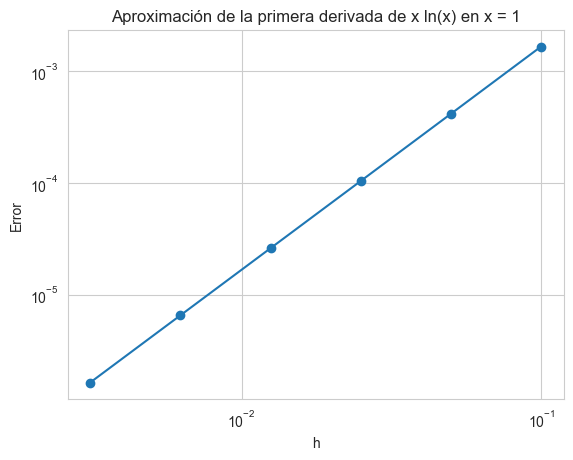

In [69]:
# Grafico y configs
plt.plot(h_values, errors, '-o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('Error')
plt.title('Aproximación de la primera derivada de x ln(x) en x = 1')
plt.show()


In [70]:
# Se busca cual es el valor minimo dentro del arreglo con respecto a h
min(errors)

1.6276089209732447e-06

El valor que minimiza el error es: $0.00313$

# Punto 3

In [71]:
# Inicializo variables para mi polinomio de taylor
x = parse_expr('x')

f = parse_expr('x*sin(x)')

x0 = 0

n = 6

In [72]:
# Se expresa el polinomio de Taylor 
p = sp.series(expr=f, x=x, x0=x0, n=n)

display(Math(sp.latex(p)))

<IPython.core.display.Math object>

In [73]:
# Se imprime cada grado del polinomio en LaTex
max_n = 8

p = [sp.series(expr=f, x=x, x0=x0, n=ni).removeO() for ni in range(2, max_n)]

p_latex = [sp.latex(pol) for pol in p]

distLatex = [display(Math(q)) for q in p_latex]

#Se guarda el tamaño del polinomio para el grafico
n_pol = len(p)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

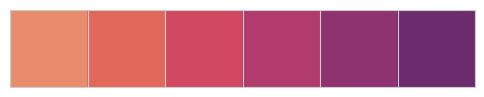

In [74]:
# config. de la grafica
sns.set_style('whitegrid')
cmap = sns.color_palette('flare')
sns.palplot(cmap)

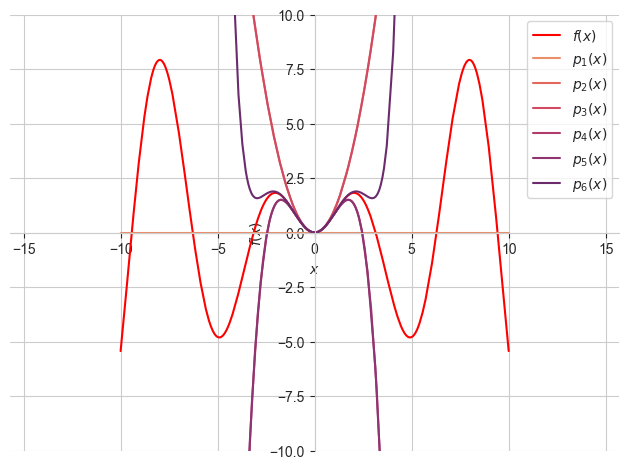

In [75]:
# Grafico
fig = pls.plot(f,xlim=[(-5*3.14),(5*3.14)],ylim=[-10, 10], line_color='r', show=False)

labs = ['$f(x)$']

# Se grafica cada grado del polinomio
for n in range(n_pol):

    c = cmap[n]

    labs.append(f'$p_{n+1}(x)$')

    fig.extend(pls.plot(p[n],xlim=[(-5*3.14),(5*3.14)],ylim=[-10,10], line_color=c, show=False))

for n in range(n_pol+1): fig[n].label = labs[n]

fig.legend = True

fig.show()